In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import explore, wrangle


In [2]:
df = pd.read_csv('prepped_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

age gender          race        date         city state  zipcode     county  \
0  24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0  Worcester   
1  52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   Grainger   
2  47   Male         White  2021-05-06  San Andreas    CA  95249.0  Calaveras   
3  49   Male         White  2021-05-05    Las Vegas    NV  89104.0      Clark   
4  30   Male         Black  2021-05-03       Biloxi    MS  39532.0   Harrison   

                                  agency_responsible cause_of_death  ...  \
0                        Leicester Police Department        gunshot  ...   
1  Bean Station Police Department, Rutledge Polic...        gunshot  ...   
2                  Calaveras County Sheriff's Office        gunshot  ...   
3           Las Vegas Metropolitan Police Department        gunshot  ...   
4                           Biloxi Police Department        gunshot  ...   

  mental_illness armed_unarmed_status alleged_weapon alleged_threat_lvl  \
0             no      Allegedly Armed            gun             attack   
1             no      Allegedly Armed            gun             attack   
2             no      Allegedly Armed            gun              other   
3             no      Allegedly Armed            gun             attack   
4             no      Allegedly Armed            gun              other   

       fleeing body_camera geography  encounter_type_draft  \
0  not fleeing          no  Suburban                 other   
1  not fleeing          no     Rural  part 1 violent crime   
2  not fleeing          no     Rural  part 1 violent crime   
3  not fleeing          no     Urban  part 1 violent crime   
4          car          no  Suburban  part 1 violent crime   

  initial_reported_reason_for_encounter_draft  \
0                        deliberate car crash   
1                                    shooting   
2                           hostage situation   
3                                    shooting   
4                                    shooting   

  known_past_shootings_of_Officer_draft  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 23 columns]

In [3]:
# encode cause of death for ML
cod_dummies = pd.get_dummies(df.cause_of_death, prefix='cod')

In [4]:
# concat dummy feats to df
df = pd.concat([df, cod_dummies], axis =1)

In [5]:
df.head()

age gender          race        date         city state  zipcode     county  \
0  24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0  Worcester   
1  52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   Grainger   
2  47   Male         White  2021-05-06  San Andreas    CA  95249.0  Calaveras   
3  49   Male         White  2021-05-05    Las Vegas    NV  89104.0      Clark   
4  30   Male         Black  2021-05-03       Biloxi    MS  39532.0   Harrison   

                                  agency_responsible cause_of_death  ...  \
0                        Leicester Police Department        gunshot  ...   
1  Bean Station Police Department, Rutledge Polic...        gunshot  ...   
2                  Calaveras County Sheriff's Office        gunshot  ...   
3           Las Vegas Metropolitan Police Department        gunshot  ...   
4                           Biloxi Police Department        gunshot  ...   

  known_past_shootings_of_Officer_draft cod_bean bag cod_beaten cod_bomb  \
0                                     0            0          0        0   
1                                     0            0          0        0   
2                                     0            0          0        0   
3                                     0            0          0        0   
4                                     0            0          0        0   

  cod_gunshot cod_other cod_pepper spray cod_physical restraint cod_taser  \
0           1         0                0                      0         0   
1           1         0                0                      0         0   
2           1         0                0                      0         0   
3           1         0                0                      0         0   
4           1         0                0                      0         0   

  cod_vehicle  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 32 columns]

In [6]:

#drop alleged_threat_lvl 'undetermined' 'none'
df.alleged_threat_lvl = df.alleged_threat_lvl.str.lower()
df = df[(df.alleged_threat_lvl != 'undetermined') & (df.alleged_threat_lvl != 'none')]

df.alleged_threat_lvl.value_counts()

attack    4248
other     2026
Name: alleged_threat_lvl, dtype: int64

In [7]:
df.race.value_counts()

White                     2791
Black                     1552
Hispanic                  1138
Unknown Race               557
Native American             96
Asian                       94
Pacific Islander            44
Hispanic                     1
Asian/Pacific Islander       1
Name: race, dtype: int64

In [8]:
df.shape

(6274, 32)

In [9]:
df['alleged_threat_lvl'] = np.where(df.alleged_threat_lvl == "attack", 1, 0)
df.dropna


<bound method DataFrame.dropna of      age gender          race        date         city state  zipcode  \
0     24   Male  Unknown Race  2021-05-09    Leicester    MA   1524.0   
1     52   Male  Unknown Race  2021-05-07     Rutledge    TN  37861.0   
2     47   Male         White  2021-05-06  San Andreas    CA  95249.0   
3     49   Male         White  2021-05-05    Las Vegas    NV  89104.0   
4     30   Male         Black  2021-05-03       Biloxi    MS  39532.0   
...   ..    ...           ...         ...          ...   ...      ...   
6619  20   Male         Black  2013-12-07   Dorchester    MA   2124.0   
6620  21   Male         Black  2013-08-07       Boston    MA   2124.0   
6621  38   Male      Hispanic  2013-06-02   Dorchester    MA   2124.0   
6622  38   Male         Black  2013-05-09       Deland    FL  32720.0   
6623  51   Male         Black  2013-04-21       Dallas    TX  75215.0   

         county                                 agency_responsible  \
0     Worcester    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6274 entries, 0 to 6623
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          6274 non-null   object 
 1   gender                                       6274 non-null   object 
 2   race                                         6274 non-null   object 
 3   date                                         6274 non-null   object 
 4   city                                         6274 non-null   object 
 5   state                                        6274 non-null   object 
 6   zipcode                                      6274 non-null   float64
 7   county                                       6274 non-null   object 
 8   agency_responsible                           6274 non-null   object 
 9   cause_of_death                               6274 non-null   object 
 10  

In [21]:
df.mental_illness.value_counts()


no                     4153
yes                    1291
unknown                 658
drug or alcohol use     172
Name: mental_illness, dtype: int64

In [11]:
df.columns

Index(['age', 'gender', 'race', 'date', 'city', 'state', 'zipcode', 'county',
       'agency_responsible', 'cause_of_death', 'description_of_circumstances',
       'official_disposition', 'criminal_charges_filed', 'mental_illness',
       'armed_unarmed_status', 'alleged_weapon', 'alleged_threat_lvl',
       'fleeing', 'body_camera', 'geography', 'encounter_type_draft',
       'initial_reported_reason_for_encounter_draft',
       'known_past_shootings_of_Officer_draft', 'cod_bean bag', 'cod_beaten',
       'cod_bomb', 'cod_gunshot', 'cod_other', 'cod_pepper spray',
       'cod_physical restraint', 'cod_taser', 'cod_vehicle'],
      dtype='object')

In [14]:
df.state.value_counts()

CA    921
TX    564
FL    427
AZ    289
GA    226
CO    221
OK    182
NC    179
WA    178
OH    174
MO    169
TN    159
PA    135
NY    128
IL    125
LA    121
IN    118
NM    116
AL    115
NV    110
KY    108
VA    108
WI    101
MI     98
SC     98
AR     96
MD     93
OR     88
NJ     77
MS     73
MN     70
UT     68
KS     58
WV     56
ID     49
MA     48
AK     44
MT     38
IA     37
HI     34
NE     27
CT     26
ME     21
SD     18
DC     17
DE     17
WY     15
NH     12
ND     10
VT      8
RI      4
Name: state, dtype: int64

In [12]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(7,7))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen', edgecolor = 'darkblue')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(16,6))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen', edgecolor='darkblue')
    p = plt.title(quant_var)
    p = plt.xticks(rotation = 90)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    p = plt.xticks(rotation = 90)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

In [13]:
# #perform univariate exploration on entire dataframe 
categorical_vars = ['age', 'gender', 'race', 'state', 'county',
       'agency_responsible', 'cause_of_death', 'description_of_circumstances',
       'official_disposition', 'criminal_charges_filed', 'mental_illness',
       'armed_unarmed_status', 'alleged_weapon', 'alleged_threat_lvl',
       'fleeing', 'body_camera', 'geography', 'encounter_type_draft',
       'initial_reported_reason_for_encounter_draft',
       'known_past_shootings_of_Officer_draft']
quant_vars = []

explore.explore_univariate(df, categorical_vars, quant_vars)

KeyboardInterrupt: 

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
#function to split data
def split(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(train, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

In [ ]:
#split the data using the split function in prepare.py
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data
train.head()

overall shape of dataframe: (6274, 32)
train: (3513, 32)
validate: (1506, 32)
test: (1255, 32)


age  gender      race        date           city state  zipcode  \
4090  54    Male     White  2017-06-07      Orrington    ME   4474.0   
3171  24    Male     White  2018-04-01      Covington    LA  70433.0   
1656  38  Female     White  2019-09-30  Mountain View    MO  65548.0   
5117  25    Male     Black  2016-06-23      Wauwatosa    WI  53225.0   
4678  45    Male  Hispanic  2016-11-22      La Mirada    CA  90638.0   

           county                       agency_responsible cause_of_death  \
4090    Penobscot                       Maine State Police        gunshot   
3171  St. Tammany      St. Tammany Parish Sheriff's Office        gunshot   
1656       Howell          Mountain View Police Department        gunshot   
5117    Milwaukee              Wauwatosa Police Department        gunshot   
4678  Los Angeles  Los Angeles County Sheriff's Department        gunshot   

      ... known_past_shootings_of_Officer_draft cod_bean bag cod_beaten  \
4090  ...                                     0            0          0   
3171  ...                                     0            0          0   
1656  ...                                     0            0          0   
5117  ...                                     0            0          0   
4678  ...                                     0            0          0   

     cod_bomb cod_gunshot cod_other  cod_pepper spray cod_physical restraint  \
4090        0           1         0                 0                      0   
3171        0           1         0                 0                      0   
1656        0           1         0                 0                      0   
5117        0           1         0                 0                      0   
4678        0           1         0                 0                      0   

     cod_taser cod_vehicle  
4090         0           0  
3171         0           0  
1656         0           0  
5117         0           0  
4678         0           0  

[5 rows x 32 columns]

In [ ]:
pd.crosstab(train.alleged_threat_lvl, train.cause_of_death)

cause_of_death      beaten  bomb  gunshot  other  pepper spray  \
alleged_threat_lvl                                               
0                        3     0     1080      3             1   
1                        3     1     2335      0             0   

cause_of_death      physical restraint  taser  vehicle  
alleged_threat_lvl                                      
0                                   14     25        9  
1                                    1     34        4

alt.Chart(...)

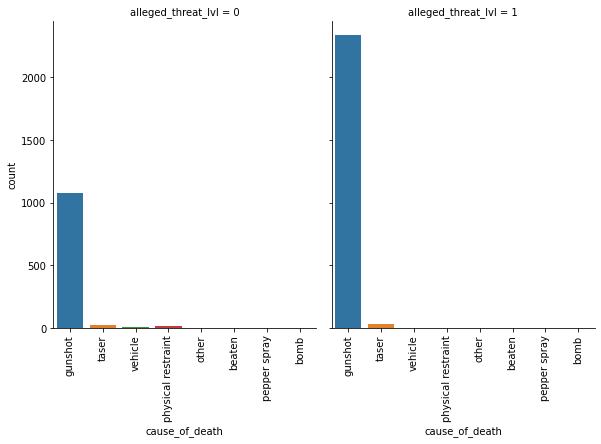

In [ ]:
g = sns.catplot(x="cause_of_death", col="alleged_threat_lvl", col_wrap=4,
                data=train,
                kind="count", height=5, aspect=.8)
g.set_xticklabels(rotation=90)
plt/

H<sub>o</sub>: There is independence between the cause of death and civilian threat level. <br>
 H<sub>a</sub>: There is a dependent relationship between the cause of death and civilian threat level.

The **Chi<sup>2</sup> test** uses a contingency table test to compare two categorical variables to test the hypothesis that one group is independant of another.  


Because the p-value is less than alpha, we reject the null hypothesis.  We will move forward with the alternative hypothesis that there is a dependent relationship between the cause of death and the civilian threat level. 

In [ ]:
explore.chi2(train, 'cause_of_death', 'alleged_threat_lvl', alpha=0.05)

Observed

[[   3    3]
 [   0    1]
 [1080 2335]
 [   3    0]
 [   1    0]
 [  14    1]
 [  25   34]
 [   9    4]]
---
Expected

[[1.93851409e+00 4.06148591e+00]
 [3.23085682e-01 6.76914318e-01]
 [1.10333760e+03 2.31166240e+03]
 [9.69257045e-01 2.03074295e+00]
 [3.23085682e-01 6.76914318e-01]
 [4.84628523e+00 1.01537148e+01]
 [1.90620552e+01 3.99379448e+01]
 [4.20011386e+00 8.79988614e+00]]
---

chi^2 = 46.8236
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


<AxesSubplot:xlabel='alleged_threat_lvl', ylabel='Count'>

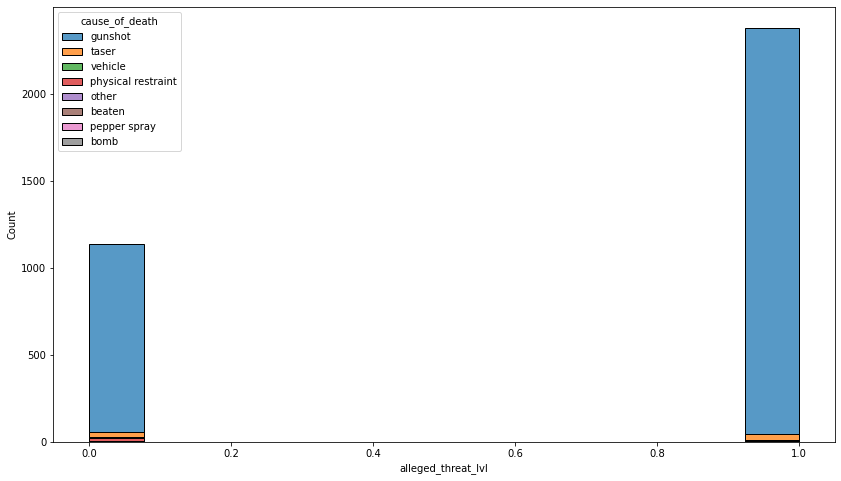

In [ ]:
plt.figure(figsize=(14, 8))
# hue_order = ['low_ach', 'avg_ach', 'high_ach']
sns.histplot(data=train, x="alleged_threat_lvl", hue = "cause_of_death", multiple="stack")

Takeaways:


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>